This file is to analyze the PSD estimated from matlab code.    

In [54]:
import sys
sys.path.append("../mypkg")

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import trange
from scipy.io import loadmat
from functools import partial
from easydict import EasyDict as edict

plt.style.use('ggplot')

In [2]:
from constants import DATA_ROOT

In [88]:
all_MEG_psd_p = DATA_ROOT/"MEG_DK_Atlas/Autism_MEG_all_PSD.mat"
all_MEG_psd = loadmat(all_MEG_psd_p)
freqs = all_MEG_psd["data_1"][0, 0][1].reshape(-1)

In [114]:
data_info_path = DATA_ROOT/'Autism_Demopoulos_DiagnosisAgeSex.csv'
data_info = pd.read_csv(data_info_path)
data_info.groupby(["Diagnosis"]).describe()

ID                                                          Age  \
          count        mean        std  min   25%    50%    75%    max count   
Diagnosis                                                                      
0          29.0  114.172414  67.587017  3.0  60.0  131.0  164.0  225.0  29.0   
1          49.0   76.408163  51.796444  2.0  36.0   73.0  100.0  223.0  49.0   

                                                                           \
                mean       std       min        25%        50%        75%   
Diagnosis                                                                   
0          12.020115  2.586562  8.000000  10.166667  11.416667  13.166667   
1          12.275510  2.608646  8.083333  10.166667  12.083333  14.416667   

                      
                 max  
Diagnosis             
0          16.833334  
1          17.000000

In [117]:
age_test = scipy.stats.ttest_ind(data_info[data_info["Diagnosis"] == 1]["Age"],
                      data_info[data_info["Diagnosis"] == 0]["Age"])
age_test

Ttest_indResult(statistic=0.41917985848954165, pvalue=0.6762671212642949)

In [115]:
tab = pd.crosstab(data_info["Sex"], data_info["Diagnosis"])
print(scipy.stats.fisher_exact(tab))
tab

(2.236842105263158, 0.1047549902043315)


Diagnosis,0,1
Sex,,
F,17,19
M,12,30


In [92]:
psd_dbs = []
for ix in range(78):
    psd_dbs.append(20*np.log10(all_MEG_psd[f"data_{ix+1}"][0, 0][0]))
psd_dbs = np.array(psd_dbs)

In [93]:
exp_grp_psd_dbs = psd_dbs[data_info["Diagnosis"] == 1]
ctrl_grp_psd_dbs = psd_dbs[data_info["Diagnosis"] == 0]

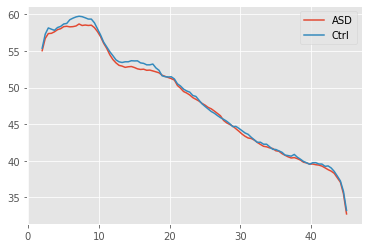

In [95]:
plt.plot(freqs, exp_grp_psd_dbs.mean(axis=(0, 1)), label="ASD")
plt.plot(freqs, ctrl_grp_psd_dbs.mean(axis=(0, 1)), label="Ctrl")
plt.legend()